In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## loading Files

In [4]:
# 1. load the orders data

In [5]:
orders_data = pd.read_excel('Ecommerce Orders Project/orders.xlsx')
orders_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [6]:
# 2. Load the payments data

In [7]:
payments_data = pd.read_excel("Ecommerce Orders Project/order_payment.xlsx")
payments_data.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,NaN


In [8]:
# 3. load the customers data

In [9]:
customers_data = pd.read_excel("Ecommerce Orders Project/customers.xlsx")
customers_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


## Describ each dataset

In [11]:
orders_data.info()
customers_data.info()
payments_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99444 entries, 0 to 99443
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99444 non-null  object        
 1   customer_id                    99444 non-null  object        
 2   order_status                   99444 non-null  object        
 3   order_purchase_timestamp       99444 non-null  datetime64[ns]
 4   order_approved_at              99284 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97661 non-null  datetime64[ns]
 6   order_delivered_customer_date  96479 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99444 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
-

## Checking missing and duplicates, also drop them if that is needed

In [13]:
# checking orders_data, its missing values as well as duplicates
orders_data.isnull().sum()


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [14]:
orders_data_clean = orders_data.fillna("N/A")

In [15]:
orders_data_clean.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [16]:
orders_data_clean.duplicated().sum()

3

In [17]:
orders_data_clean.drop_duplicates(inplace = True)
orders_data_clean.duplicated().sum()

0

In [18]:
orders_data_clean.shape

(99441, 8)

In [19]:
# checking customers_data

In [20]:
customers_data.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [21]:
customers_data.duplicated().sum()

0

In [22]:
# checking payments_data

In [23]:
payments_data.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           2
dtype: int64

In [24]:
payments_data_clean = payments_data.dropna()

In [25]:
payments_data_clean.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [26]:
payments_data_clean.duplicated().sum()

1

In [27]:
# when deleting duplicates, it has to be eliminated from the original dataset, not a copy of slice from the original dataset
# thus, paymnets_data_clean can not be used here

In [28]:
payments_data.drop_duplicates(inplace = True)

In [29]:
payments_data_clean.duplicated().sum()

1

## Filtering the Data
### 1.Select a subset of the orders data based on the order status
### 2.Select a subset of the payments data where payment type = Credit Card and payment value > 1000
### 3.Select a subset of customers based on customer state = SP


In [31]:
#1
order_status_invoiced = orders_data_clean[orders_data_clean['order_status'] == 'invoiced']
order_status_invoiced.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
7,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,N/A,N/A,2017-05-09
106,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,N/A,N/A,2018-08-21
458,38b7efdf33dd5561f4f5d4f6e07b0414,021e84751ba0ead75b6d314a6ead88d9,invoiced,2017-08-01 18:17:41,2017-08-01 18:32:30,N/A,N/A,2017-08-28
1836,51b0dccc8596ce37a930dff2d63a10a2,31bf1057b00f14804278590bbac18b1b,invoiced,2017-05-05 22:34:48,2017-05-05 22:45:12,N/A,N/A,2017-06-06
2119,5504eaa5a86eb25fa666cf2e6b96c701,a30be38e1ed0ffb39b318bf1d15e98d9,invoiced,2017-11-29 08:33:06,2017-11-29 08:56:23,N/A,N/A,2017-12-20


In [32]:
#2
payment_type_value = payments_data_clean[
(payments_data_clean ['payment_type']== 'credit_card') & 
(payments_data_clean['payment_value'] > 1000)
]
payment_type_value.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
161,886b114d034f4ac1d39d964c1b2a8182,1,credit_card,10,2027.16
168,62d9b911d7c56cf455f660eecb8ddd3a,1,credit_card,10,1002.73
248,4ff8e28200e5a7a50b448cfaaf1f8ed3,1,credit_card,10,2288.31
360,ce6d150fb29ada17d2082f4847107665,1,credit_card,10,1586.47
435,e11fec6c25945565c1ef4f14fc3c03b7,1,credit_card,10,1995.69


In [33]:
#3
customer_state = customers_data[customers_data['customer_state'] == 'SP']
customer_state.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


## Merge and Join Dataframes to get a master dataset with all dataframes combined

In [35]:
orders_data_clean.shape

(99441, 8)

In [36]:
payments_data_clean.shape

(103885, 5)

In [37]:
merged_data = pd.merge(orders_data_clean, payments_data_clean, on = 'order_id')
merged_data.shape
merged_data.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
dtype: int64

In [38]:
master_data = pd.merge(merged_data, customers_data, on = 'customer_id')
master_data.shape


(103885, 16)

## Data Visulization


In [40]:
#  subtract year, month, and week from order_purchase_timestamp to create 3 more columns for future analysis


In [41]:
master_data['month_year'] = master_data['order_purchase_timestamp'].dt.to_period('M')
master_data['week_year'] = master_data['order_purchase_timestamp'].dt.to_period('W')
master_data['year'] = master_data['order_purchase_timestamp'].dt.to_period('Y')

In [42]:
master_data.columns


Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'month_year', 'week_year', 'year'],
      dtype='object')

In [43]:
master_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,month_year,week_year,year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10,2017-10-02/2017-10-08,2017
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10,2017-10-02/2017-10-08,2017
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10,2017-10-02/2017-10-08,2017
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,boleto,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07,2018-07-23/2018-07-29,2018
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08,2018-08-06/2018-08-12,2018


In [44]:
# payment for different month

In [45]:
month_paymnets_sum =  master_data.groupby('month_year')['payment_value'].sum()

In [46]:
print("the sum of payment for different month is:", month_paymnets_sum )

the sum of payment for different month is: month_year
2016-09        252.24
2016-10      59090.48
2016-12         19.62
2017-01     138488.04
2017-02     291908.01
2017-03     449863.60
2017-04     417788.03
2017-05     592918.82
2017-06     511328.22
2017-07     592382.92
2017-08     674293.66
2017-09     727762.45
2017-10     779677.88
2017-11    1194882.80
2017-12     878401.48
2018-01    1115004.18
2018-02     992463.34
2018-03    1159652.12
2018-04    1160785.48
2018-05    1153853.70
2018-06    1023880.50
2018-07    1066540.75
2018-08    1022425.32
2018-09       4439.54
2018-10        589.67
Freq: M, Name: payment_value, dtype: float64


In [57]:
#convert month_year from period into string to be able to visulize.
master_data['month_year'] = master_data['month_year'].astype(str)

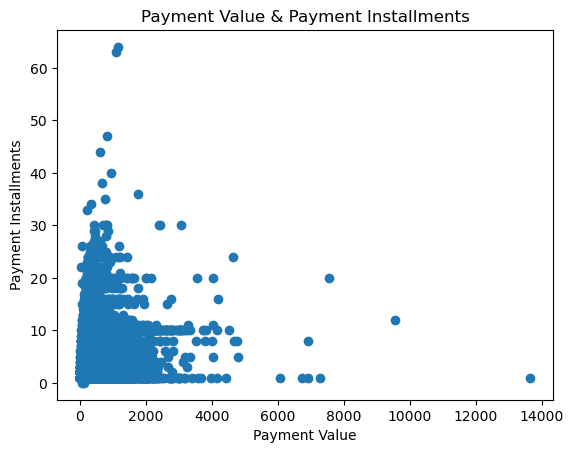

In [71]:
# create the DataFrame
scatter_df = master_data.groupby('customer_unique_id').agg({
'payment_value': 'sum', 
'payment_installments': 'sum'
                                 })
plt.scatter(scatter_df['payment_value'],scatter_df['payment_installments'])
plt.xlabel('Payment Value')
plt.ylabel('Payment Installments')
plt.title('Payment Value & Payment Installments')
plt.show()

Text(0.5, 1.0, 'Payment per Payment Type by Month')

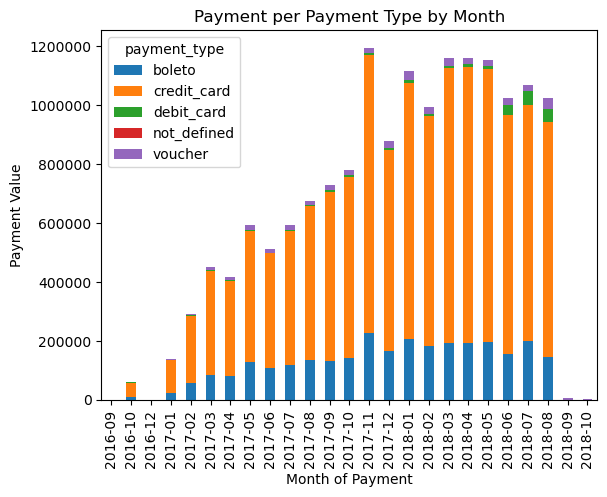

In [73]:
# Creating a bar chart

bar_chart_df = master_data.groupby(['payment_type', 'month_year'])['payment_value'].sum()
bar_chart_df = bar_chart_df.reset_index()

pivot_data = bar_chart_df.pivot(index='month_year', columns='payment_type', values='payment_value')

pivot_data.plot(kind='bar', stacked='True')
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.xlabel('Month of Payment')
plt.ylabel('Payment Value')
plt.title('Payment per Payment Type by Month')


In [75]:
# Creating a box plot

payment_values = master_data['payment_value']
payment_types = master_data['payment_type']

C:\Users\cao20\AppData\Local\Temp\ipykernel_7676\1341589418.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ payment_values[payment_types == 'credit_card'],


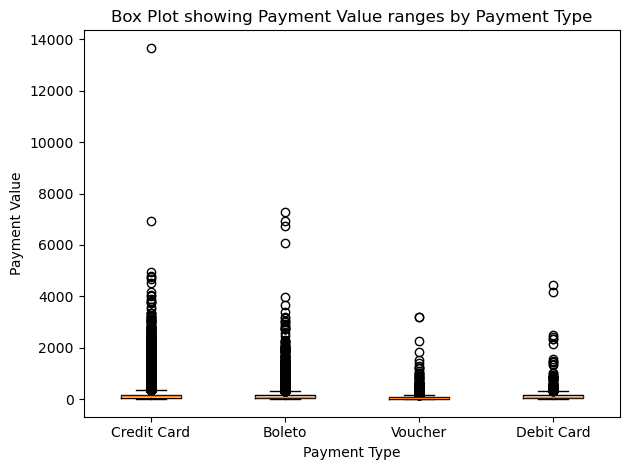

In [79]:
plt.boxplot([ payment_values[payment_types == 'credit_card'],
             payment_values[payment_types == 'boleto'],
             payment_values[payment_types == 'voucher'],
             payment_values[payment_types == 'debit_card']],
            labels = ['Credit Card', 'Boleto', 'Voucher', 'Debit Card']  
            )
plt.xlabel('Payment Type')
plt.ylabel('Payment Value')
plt.title('Box Plot showing Payment Value ranges by Payment Type')
plt.tight_layout()

plt.show()